# HOMEWORK 5 ADM 

In [58]:
data = {'Name': ['Ramona Tarantino', 'Nicola', 'MIchela', 'Gianmarco'],
        'Matricula': [2082006, 347842, 2343838, 338748],
        'Email': ['ramonatarantino@gmail.com', 'email', 'email', 'email']}

In [60]:
data = pd.DataFrame(data)


In [61]:
display(data)

,Name,Matricula,Email
0,Ramona Tarantino,2082006,ramonatarantino@gmail.com
1,Nicola,347842,email
2,MIchela,2343838,email
3,Gianmarco,338748,email


In [63]:
import pandas as pd
import networkx as nx
import numpy as np


## Dataset

In [68]:
edges = pd.read_csv("edges.csv")
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
hero_network = pd.read_csv('hero-network.csv')
hero_network 

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
nodes = pd.read_csv('nodes.csv')
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


## LEZIONE 13_12 

### ADDING NODES


In [ ]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Add some nodes and edges to the graph 
G.add_node(1) #we pass the label of the node 
G.add_nodes_from([2,3])

G.nodes()
# Draw the graph
nx.draw(G)



In [ ]:
G.nodes()[1]['name'] = 'Spiderman'
G.nodes()[1]

In [ ]:
G.add_nodes_from([(4,{'name' :'Thor'}), (15, {'comic': 'Peter Parker'})])

In [ ]:
G.nodes()

In [ ]:
G.remove_node(4)

### ADDING EDGES + ATTRIBUTES

In [ ]:
G.add_edge(1,2)

In [ ]:
G.add_edges_from([(2,3), (1,4), (2,15)])

In [ ]:
G.edges()

In [ ]:
G.edges()[(1,2)]['weight'] =0.5
G.edges()[(1,2)]

In [ ]:
list(G.edges)

In [ ]:
G.remove_edge(2,15)

In [ ]:
nx.draw(G)

### STATS

In [ ]:
nx.info(G)

In [ ]:
G.degree(15)

### ADJACENCY

In [ ]:
G[1] #vede a chi è connesso

In [ ]:
G[2]

In [ ]:
G.nodes.data()

### VISUALIZATION

In [ ]:
G.add_edge(2,15)

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
nx.draw(G, with_labels=True, node_color= 'limegreen')
plt.show()


In [ ]:
C= nx.complete_graph(20)
nx.draw(C, with_labels=True, node_color= 'limegreen')

In [ ]:
H=nx.cycle_graph(5)
nx.draw(H, with_labels=True, node_color= 'limegreen')

In [ ]:
L =nx.lollipop_graph(6,3)
nx.draw(L, with_labels=True, node_color= 'limegreen')

In [ ]:
SG = L.subgraph([6,7,8])
nx.draw(SG, with_labels=True, node_color= 'limegreen')

In [ ]:
HL = nx.union(H, L, rename=('H-', 'L-'))

In [ ]:
nx.draw(HL, with_labels=True, node_color= 'limegreen')

In [ ]:
G = nx.complete_graph(4)

In [ ]:
nx.draw(G, with_labels=True, node_color= 'limegreen')

In [ ]:
nx.is_connected(G)

### GRAPH SETUP

In [ ]:
import pandas as pd 
G_hero_net = nx.MultiGraph()

In [ ]:
hero_network

In [ ]:
G_hero_net.add_edge(hero_network.loc[0].hero1, hero_network.loc[0].hero2)

In [ ]:
G_hero_net.nodes

In [ ]:
hero_network.loc[0]

In [ ]:
hero_network.apply(lambda row: G_hero_net.add_edge(row['hero1'], row['hero2']), axis=1)

In [ ]:
#create a new GRAPG 

G_hero_2 = nx.from_pandas_edgelist(hero_network, 'hero1', 'hero2', create_using = nx.MultiGraph)

In [ ]:
nx.info(G_hero_2)

In [ ]:
nx.degree_centrality(G_hero_net)['PRINCESS ZANDA']

In [ ]:
nx.betweenness_centrality(G_hero_net)['PRINCESS ZANDA']

In [ ]:
nx.node_connectivity(G_hero_net,'PRINCESS ZANDA', "BLACK PANTHER/T'CHAL")

In [ ]:
G_hero_net.nodes()

### FINE LEZIONE 

# 1. Data

### DATA PREPROCESSING
- Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
- Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
- The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.


In [ ]:
import csv
import re

# Read the hero-network.csv file
with open('hero-network.csv', 'r') as f:
    reader = csv.reader(f)
    
    # Create a new list to hold the cleaned data
    cleaned_data = []
    
    # Loop through the rows in the CSV file
    for row in reader:
        # Use a regular expression to remove the extra spaces from the names
        # in the row
        cleaned_row = [re.sub(r' +', '', name) for name in row]
        
        
        # Add the cleaned row to the list
        cleaned_data.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('hero-network-cleaned.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(cleaned_data)

    #questo funziona

In [ ]:
# find the names that appear in both sets of names
import pandas as pd
df1 = pd.read_csv('hero-network-cleaned.csv')

# read the second dataset into a dataframe
df2 = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in the first dataset
hero_names1 = set(df1['hero1']) | set(df1['hero2'])

# create a set of hero names from the hero column in the second dataset
hero_names2 = set(df2['hero'])

common_names = df1[df1['hero1'].isin(hero_names2) | df1['hero2'].isin(hero_names2)]

# print the common names
print(common_names)

common_names.count()


In [ ]:
# read the hero-network.csv file into a dataframe
import pandas as pd
hero_network_df = pd.read_csv('hero-network.csv')

# read the edges.csv file into a dataframe
edges_df = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in hero-network.csv
hero_network_names = set(hero_network_df['hero1']) | set(hero_network_df['hero2'])

# create a set of hero names from the hero column in edges.csv
edges_names = set(edges_df['hero'])

# find the names that appear in hero-network.csv but not in edges.csv
# and remove any extra spaces and the extra '/' from the end of the names
missing_names = [name.strip()[:-1] for name in hero_network_names - edges_names if name[-1] == '/']

# update the names in hero-network.csv to match the names in edges.csv
hero_network_df.loc[hero_network_df['hero1'].isin(missing_names), 'hero1'] = missing_names
hero_network_df.loc[hero_network_df['hero2'].isin(missing_names), 'hero2'] = missing_names

# write the updated dataframe to a new csv file
hero_network_df.to_csv('hero-network-corrected.csv', index=False)


In [ ]:
print(missing_names)

In [ ]:
hero_network_df_corrected = pd.read_csv('hero-network-corrected.csv')
hero_network_df_corrected 

In [ ]:


# load the dataset into a pandas DataFrame
hero_network_df_corrected = pd.read_csv('hero-network.csv')

# replace the string 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER' in columns 'hero1' and 'hero2'
hero_network_df_corrected['hero1'] = hero_network_df_corrected['hero1'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')
hero_network_df_corrected['hero2'] = hero_network_df_corrected['hero2'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')

# save the modified DataFrame to a new CSV file
hero_network_df_corrected.to_csv('modified-hero-network.csv', index=False)


In [7]:
df = pd.read_csv('modified-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [ ]:
df[df.hero1 == 'SPIDER-MAN/PETER PARKER']

In [ ]:
df[df.hero2 == 'SPIDER-MAN/PETER PARKER']

In [ ]:
df

- Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

In [ ]:
df_subset = df[df['hero1'] != df['hero2']]

# save the new DataFrame to a new CSV file
df_subset.to_csv('final-hero-network.csv', index=False)

In [16]:
df = pd.read_csv('final-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


In [9]:
count = df[df['hero1'] == df['hero2']].shape[0]

# print the count
print(count)

#OK IT WORKS, there's not the duplicate rows

0


In [17]:
df = df[df['hero1'] != df['hero2']]

In [19]:
df.to_csv('final-hero-network2.csv', index=False)

In [20]:
df = pd.read_csv('final-hero-network2.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


#### 'final-hero-network2.csv' is the final dataset preprocessed

### Graphs setup

**First graph** : Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.



In [88]:
df_hero = pd.read_csv('final-hero-network2.csv')
edge_df = df_hero.groupby(['hero1', 'hero2']).size().reset_index(name='weight')
G = nx.from_pandas_edgelist(edge_df, 'hero1', 'hero2', edge_attr='weight', create_using = nx.MultiGraph)


In [44]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6426
Number of edges: 224169


In [46]:
nx.info(G)

'MultiGraph with 6426 nodes and 224169 edges'

This will create a graph with the nodes and edges as specified in the 'hero-network.csv' file, with edges that have a weight attribute equal to the number of times the two heroes have collaborated in different comics. The cost of the edge will be lower for heroes with more collaborations, as requested.

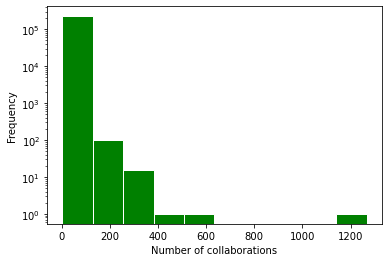

In [104]:
import matplotlib.pyplot as plt

# Get the edge weights from the graph
edge_weights = nx.get_edge_attributes(G, 'weight')

# Convert the edge weights to a list
weights = list(edge_weights.values())

# Plot a histogram of the edge weights
plt.hist(weights, color = 'green', log=True, edgecolor = 'white')
plt.xlabel('Number of collaborations')
plt.ylabel('Frequency')
plt.show()


This will plot a histogram of the edge weights in the graph, with the x-axis representing the number of collaborations and the y-axis representing the frequency of each value. Plot to verify that the cost of the edge is lower for heroes with more collaborations.

### SECOND GRAPH

In [90]:
import pandas as pd
import networkx as nx

# Read the nodes data from nodes.csv into a DataFrame
nodes_df = pd.read_csv('nodes.csv')

# Read the edges data from edges.csv into a DataFrame
edges_df = pd.read_csv('edges.csv')

# Create a graph from the edges DataFrame
G2 = nx.from_pandas_edgelist(edges_df, 'hero', 'comic')

# Set the node type as an attribute of the nodes in the graph
nodes_df = nodes_df.set_index('node')
node_types = nodes_df['type']
nx.set_node_attributes(G2, node_types, 'type')


In [91]:
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

In [92]:
for node, attributes in G2.nodes.items():
    print(f'Node {node} has attributes: {attributes}')


Node 24-HOUR MAN/EMMANUEL has attributes: {'type': 'hero'}
Node AA2 35 has attributes: {'type': 'comic'}
Node 3-D MAN/CHARLES CHAN has attributes: {'type': 'hero'}
Node AVF 4 has attributes: {'type': 'comic'}
Node AVF 5 has attributes: {'type': 'comic'}
Node COC 1 has attributes: {'type': 'comic'}
Node H2 251 has attributes: {'type': 'comic'}
Node H2 252 has attributes: {'type': 'comic'}
Node M/PRM 35 has attributes: {'type': 'comic'}
Node M/PRM 36 has attributes: {'type': 'comic'}
Node M/PRM 37 has attributes: {'type': 'comic'}
Node WI? 9 has attributes: {'type': 'comic'}
Node 4-D MAN/MERCURIO has attributes: {'type': 'hero'}
Node CA3 36 has attributes: {'type': 'comic'}
Node CM 51 has attributes: {'type': 'comic'}
Node Q 14 has attributes: {'type': 'comic'}
Node Q 16 has attributes: {'type': 'comic'}
Node T 208 has attributes: {'type': 'comic'}
Node T 214 has attributes: {'type': 'comic'}
Node T 215 has attributes: {'type': 'comic'}
Node T 216 has attributes: {'type': 'comic'}
Node T

Node M/TU 53 has attributes: {'type': 'comic'}
Node NM 26 has attributes: {'type': 'comic'}
Node NM 3 has attributes: {'type': 'comic'}
Node NM 46 has attributes: {'type': 'comic'}
Node UX 100 has attributes: {'type': 'comic'}
Node UX 101 has attributes: {'type': 'comic'}
Node UX 102 has attributes: {'type': 'comic'}
Node UX 103 has attributes: {'type': 'comic'}
Node UX 104 has attributes: {'type': 'comic'}
Node UX 105 has attributes: {'type': 'comic'}
Node UX 106 has attributes: {'type': 'comic'}
Node UX 110 has attributes: {'type': 'comic'}
Node UX 111 has attributes: {'type': 'comic'}
Node UX 112 has attributes: {'type': 'comic'}
Node UX 113 has attributes: {'type': 'comic'}
Node UX 114 has attributes: {'type': 'comic'}
Node UX 115 has attributes: {'type': 'comic'}
Node UX 116 has attributes: {'type': 'comic'}
Node UX 117 has attributes: {'type': 'comic'}
Node UX 118 has attributes: {'type': 'comic'}
Node UX 119 has attributes: {'type': 'comic'}
Node UX 126 has attributes: {'type': 

Node AWC 56/2 has attributes: {'type': 'comic'}
Node AWC 80 has attributes: {'type': 'comic'}
Node CA 101 has attributes: {'type': 'comic'}
Node CA 102 has attributes: {'type': 'comic'}
Node CA 103 has attributes: {'type': 'comic'}
Node CA 10/4 has attributes: {'type': 'comic'}
Node CA 104 has attributes: {'type': 'comic'}
Node CA 106 has attributes: {'type': 'comic'}
Node CA 107 has attributes: {'type': 'comic'}
Node CA 108 has attributes: {'type': 'comic'}
Node CA 109 has attributes: {'type': 'comic'}
Node CA 11 has attributes: {'type': 'comic'}
Node CA 110 has attributes: {'type': 'comic'}
Node CA 111 has attributes: {'type': 'comic'}
Node CA 11/2 has attributes: {'type': 'comic'}
Node CA 117 has attributes: {'type': 'comic'}
Node CA 118 has attributes: {'type': 'comic'}
Node CA 119 has attributes: {'type': 'comic'}
Node CA 120 has attributes: {'type': 'comic'}
Node CA 122 has attributes: {'type': 'comic'}
Node CA 123 has attributes: {'type': 'comic'}
Node CA 124 has attributes: {'t

Node H:PL 3 has attributes: {'type': 'comic'}
Node HTD 10 has attributes: {'type': 'comic'}
Node IM 56 has attributes: {'type': 'comic'}
Node IMSVS 1/3 has attributes: {'type': 'comic'}
Node LSHOT 6 has attributes: {'type': 'comic'}
Node M/CP 101/3 has attributes: {'type': 'comic'}
Node M/CP 102/3 has attributes: {'type': 'comic'}
Node M/CP 103/3 has attributes: {'type': 'comic'}
Node M/CP 103/4 has attributes: {'type': 'comic'}
Node M/CP 104/3 has attributes: {'type': 'comic'}
Node M/CP 105/3 has attributes: {'type': 'comic'}
Node M/CP 106/3 has attributes: {'type': 'comic'}
Node M/CP 19/3 has attributes: {'type': 'comic'}
Node M/CP 20/3 has attributes: {'type': 'comic'}
Node M/CP 44/3 has attributes: {'type': 'comic'}
Node M/CP 61/4 has attributes: {'type': 'comic'}
Node M/CP 79 has attributes: {'type': 'comic'}
Node M/CP 79/4 has attributes: {'type': 'comic'}
Node M/FAN 20 has attributes: {'type': 'comic'}
Node M/FAN 21 has attributes: {'type': 'comic'}
Node M/FAN 31/2 has attribute

Node MAD VIKING/KNUT CAIN has attributes: {'type': 'hero'}
Node MAELEN has attributes: {'type': 'hero'}
Node MAELSTROM/MALCOLM ST has attributes: {'type': 'hero'}
Node MAESTRO has attributes: {'type': 'hero'}
Node MAGDALENE/MARISSA DA has attributes: {'type': 'hero'}
Node MAGGOTT/JAPHETH has attributes: {'type': 'hero'}
Node MAGIC has attributes: {'type': 'hero'}
Node MAGIK/ILLYANA RASPUT has attributes: {'type': 'hero'}
Node MAGMA/AMARA AQUILLA/ has attributes: {'type': 'hero'}
Node MAGMA II/JONATHAN DA has attributes: {'type': 'hero'}
Node WOSM 17 has attributes: {'type': 'comic'}
Node MAGNESIUM has attributes: {'type': 'hero'}
Node MAGNETO/MAGNUS/ERIC has attributes: {'type': 'hero'}
Node AWC 59 has attributes: {'type': 'comic'}
Node CX 12/2 has attributes: {'type': 'comic'}
Node CX 19/2 has attributes: {'type': 'comic'}
Node UX 304 has attributes: {'type': 'comic'}
Node X -1 has attributes: {'type': 'comic'}
Node XU 2 has attributes: {'type': 'comic'}
Node MAGNETO | MUTANT X-V has 

Node WARHAWK II has attributes: {'type': 'hero'}
Node WARHAWK III/TOM NAKA has attributes: {'type': 'hero'}
Node WARHEAD/GREGORY SLIV has attributes: {'type': 'hero'}
Node WARKOVSKY, SEN. has attributes: {'type': 'hero'}
Node WARLOCK II/ADAM WARL has attributes: {'type': 'hero'}
Node M/PRM 2 has attributes: {'type': 'comic'}
Node WLOCK 4 has attributes: {'type': 'comic'}
Node WARLOCK III has attributes: {'type': 'hero'}
Node WARLORD has attributes: {'type': 'hero'}
Node WAR MACHINE II/PARNE has attributes: {'type': 'hero'}
Node WARP SAVANT has attributes: {'type': 'hero'}
Node WARPY has attributes: {'type': 'hero'}
Node WARR has attributes: {'type': 'hero'}
Node WARREN, MR. has attributes: {'type': 'hero'}
Node WARRIOR WOMAN/JULIA has attributes: {'type': 'hero'}
Node WARSTAR has attributes: {'type': 'hero'}
Node WARTON/WARBECK has attributes: {'type': 'hero'}
Node WAR TOY/ALKHEMA has attributes: {'type': 'hero'}
Node WASP/JANET VAN DYNE has attributes: {'type': 'hero'}
Node M/CP 48/3 

This code will create an undirected, unweighted graph with nodes for each hero and comic in the data, and edges between heroes and comics indicating which heroes appear in which comics. The node type (hero or comic) will be stored as an attribute of the node.

### Save the two graphs in a pickle files 

In [93]:
import pickle

# Save the graph to a file using pickle
with open('graph1.pickle', 'wb') as f:
    pickle.dump(G, f)
    
with open('graph2.pickle', 'wb') as f:
    pickle.dump(G2, f)
    

In [94]:
with open('graph1.pickle', 'rb') as f:
    G1 = pickle.load(f)


In [96]:
nx.info(G1)

'MultiGraph with 6426 nodes and 224169 edges'

In [97]:
with open('graph2.pickle', 'rb') as f:
    G2 = pickle.load(f)